<center><h1>Exploring Flight Delays in Major US Airlines</h1></center>
<hr>

## Authors

- Ray Toh hongxian@comp.nus.edu.sg
- Damus Lim damus98@gmail.com

## Problem Statement & Dataset Selected [3]

### Volume of flight delays for each airline/airport 

We chose this research topic because we have both worked at changi airport before and are avid travelers,
which is why we want to find out more on the relationship between the flight delay timings and the type of airline used for transportation. 

By the end of the report, we aim to explore the following questions:

- Which airline(s) are likely to delay their departure
- Is there a correlation between flight delay and other factors
- Is the Hub-and-Spoke operations beneficial at all


### Dataset(s) used:
- Kaggle, Department of Transportation https://www.kaggle.com/usdot/flight-delays (CSV) retrieved on 30 May 2019


## Executive Summary [3]


With flight delay being prevalent in all airlines, it can be a challenge to gauge how a particular airline is faring as compared to its competitors in terms of delay timing. To do so, a search on the Global norm for flight delay timings was conducted. According to The Economist, the global average for flight delays is 27 minutes. This means that if an airline wants to reduce their flight delay timings so as to increase customers’ satisfaction and improve its competitive, it is essential for them to reduce their flight delays to less than the industry standards of 27 minutes. Thus, our central goal is to understand the flight delays of Spirit Airlines as compared to the industry median of 27 mins. Our data in flight.csv comprises of the magnitude of flight delays of Spirit Airlines (and 13 other major US airlines) flight in 2015.

### Hypothesis

Throughout our analysis, we have made simple visualisations to establish the context and made certain assumptions to aid us in our data analysis.

For example, initially we find that:

- low cost carriers (LCCs) are most likely to delay their departure compared to full service carriers (FSCs)
- flight delays are more prevalent on the weekends
- airlines are most likely to delay their arrival due to a late inbound aircraft

After further analysis, we either confirmed or debunked these hypothesis with the limited dataset that we have. In this proposal, we made an assumption that the regression model created is accurate due to a lack of sufficient sample. Furthermore, this very dataset does not include each and every single american airlines, which limits the conclusion that we can draw on LCCs vs FSCs. More data from various countries and airlines will be required to cross check our findings, which we are unable to obtain at the current moment due to limited resources.

## Methodology, Insights and Evaluation [14]

- Empty cells of the given dataset was removed as we drop rows which doesn't fit the 'delay' criterion
- The full airline/airport name came in a separate CSV file, multiple dataframes are merged into one for easy manipulation 
- Categorical analysis was done using data visualisation. This allows for easy comparison and visualisation across different airlines and airports
- A linear regression model will be used to further explore other correlations with flight delays

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf 

pd.options.display.float_format = '{:,.2f}'.format
sns.set()

According to our business proposal, the main focus is on flight delay not aircraft diversion or cancellation as those are beyond our control.

Given the distance travelled and flight time (AIR_TIME), we will be able to calculate the speed of the aircraft (miles per hour) with the following equation.

Speed = Distance / Time

### Hence, reading essential CSV files

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
data = pd.read_csv('flights.csv')
data.shape
data.head().T

C:\Users\pinkr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,5,10,20,20,25


<br/>

- Removal of flight details which are cancelled or diverted
- Removal of rows which are not necessary for our analysis
- Creation of column for 'AIRCRAFT_SPEED'

In [3]:
data = data[data['CANCELLED']==0]
data = data[data['DIVERTED']==0]

data = data.drop(['FLIGHT_NUMBER', 'TAIL_NUMBER', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON'], axis = 1)
data['AIRCRAFT_SPEED'] = data['DISTANCE']/(data['AIR_TIME']/60)

Incorporation of another dataframe using df.merge()

In [4]:
data = pd.merge(data, airlines, left_on = 'AIRLINE', right_on = 'IATA_CODE', how = 'left')
data.rename(columns = {'AIRLINE_x' : 'AIRLINE_CODE'}, inplace = True)
data.insert(loc = 5, column = 'AIRLINE', value = data.AIRLINE_y)
data = data.drop(['IATA_CODE', 'AIRLINE_y'], axis = 1)

data = pd.merge(data, airports[['IATA_CODE', 'CITY']], left_on = 'ORIGIN_AIRPORT', right_on = 'IATA_CODE')
data.insert(loc = 7, column = 'ORIGIN_CITY', value = data.CITY)
data = data.drop(['IATA_CODE', 'CITY'], axis = 1)
data = pd.merge(data, airports[['IATA_CODE', 'CITY']], left_on = 'DESTINATION_AIRPORT', right_on = 'IATA_CODE')
data.insert(loc = 9, column = 'DESTINATION_CITY', value = data.CITY)
data = data.drop(['IATA_CODE', 'CITY'], axis = 1)

In [5]:
data.head(2).T

,0,1
YEAR,2015,2015
MONTH,1,1
DAY,1,1
DAY_OF_WEEK,4,4
AIRLINE_CODE,AS,AS
AIRLINE,Alaska Airlines Inc.,Alaska Airlines Inc.
ORIGIN_AIRPORT,ANC,ANC
ORIGIN_CITY,Anchorage,Anchorage
DESTINATION_AIRPORT,SEA,SEA
DESTINATION_CITY,Seattle,Seattle


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

Finding rows with NaN datas

In [6]:
missing_dict = {'Missing Data' : data.isna().sum(), 'Percentage' : 100*data.isna().sum()/len(data)}
missing = pd.DataFrame(data = missing_dict)
missing

,Missing Data,Percentage
YEAR,0,0.00
MONTH,0,0.00
DAY,0,0.00
DAY_OF_WEEK,0,0.00
AIRLINE_CODE,0,0.00
AIRLINE,0,0.00
ORIGIN_AIRPORT,0,0.00
ORIGIN_CITY,0,0.00
DESTINATION_AIRPORT,0,0.00
DESTINATION_CITY,0,0.00


80.82% of the data in 'AIR_SYSTEM_DELAY' to 'WEATHER_DELAY' are missing because they are only available when there is an aircraft delay. (Also to indicate that 19.18% of all flights had delays)

According to Federal Aviation Administration, a flight is considered to be delayed if the arrival time is more than 15 minutes of the scheduled arrival time. 
After setting the condition of flight delay to be greater than or equal to 15 minutes, the number of missing data is shown below. 

### Hence, creating a new dataframe to contain only delayed flights

In [7]:
data_delay = data[data['ARRIVAL_DELAY']>=15]
data_delay.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE_CODE           0
AIRLINE                0
ORIGIN_AIRPORT         0
ORIGIN_CITY            0
DESTINATION_AIRPORT    0
DESTINATION_CITY       0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
AIRCRAFT_SPEED         0
dtype: int64

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

###  Understanding the inter-airline flight delay across United States airlines

In [8]:
# Performing groupby and aggregation to obtain desired results

net_delay = data_delay.groupby('AIRLINE')[['ARRIVAL_DELAY']].count()
total_flights = data.groupby('AIRLINE')[['YEAR']].count()

percentage = pd.concat([net_delay,total_flights], axis = 1)
percentage.columns = ['net_delay', 'total_flights']
percentage.insert(loc = 2, column = 'percentage', value = 100*(percentage['net_delay']/percentage['total_flights']))
percentage['rank'] = percentage['percentage'].rank(ascending = False).astype(int)
percentage = percentage.sort_values(by = 'rank')
percentage = percentage.reset_index()
percentage

,AIRLINE,net_delay,total_flights,percentage,rank
0,Spirit Air Lines,32054,105059,30.51,1
1,Frontier Airlines Inc.,22383,82005,27.29,2
2,JetBlue Airways,55160,240304,22.95,3
3,American Eagle Airlines Inc.,58259,257130,22.66,4
4,United Air Lines Inc.,99262,462086,21.48,5
5,Atlantic Southeast Airlines,102477,509621,20.11,6
6,Southwest Airlines Co.,224168,1138350,19.69,7
7,Virgin America,10895,55813,19.52,8
8,Skywest Airlines Inc.,101151,528328,19.15,9
9,American Airlines Inc.,120100,636554,18.87,10


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

###  Visualisation of the percentage of delayed flights

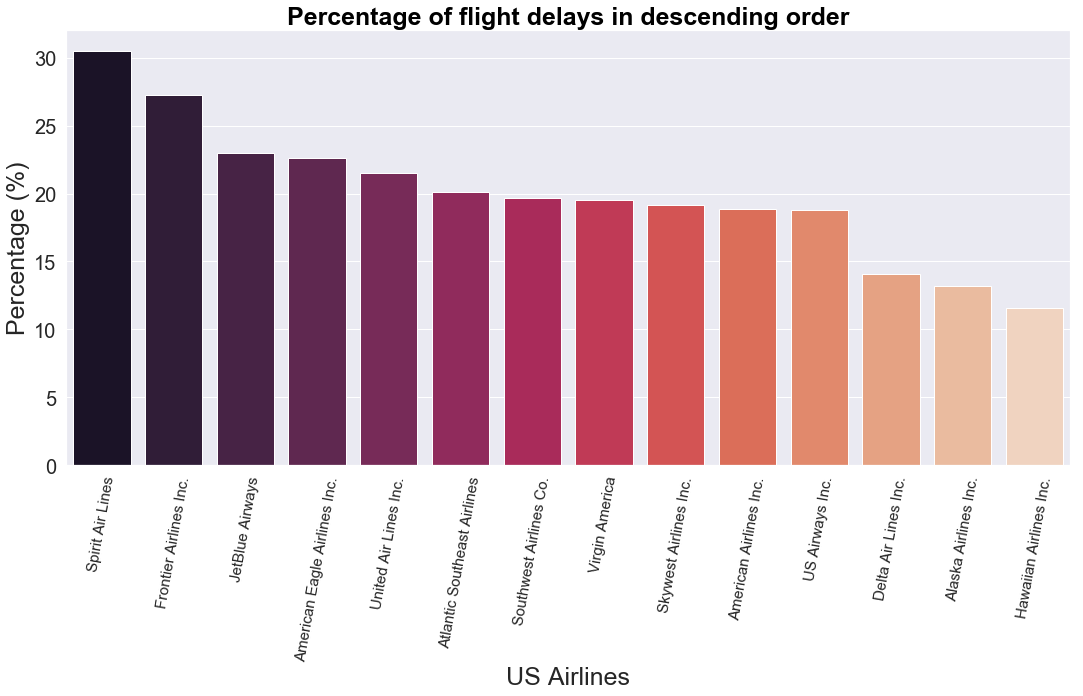

In [9]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'AIRLINE', y = 'percentage', data = percentage, palette = 'rocket')
plt.xticks(rotation = 80, fontsize = 15)
plt.title('Percentage of flight delays in descending order', color = 'black', fontweight="bold", fontsize = 25)
plt.xlabel('US Airlines', fontsize = 25)
plt.ylabel('Percentage (%)', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Visualising market share of all major american airlines

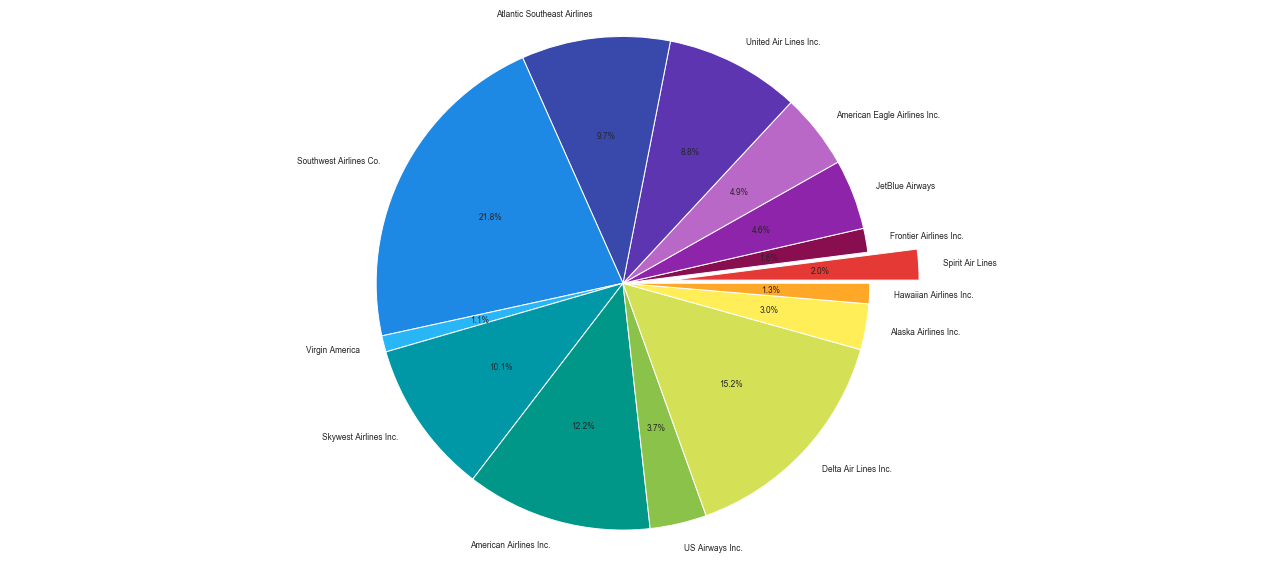

In [10]:
import matplotlib

airline_list = percentage.AIRLINE.T.tolist()
flights_list = percentage.total_flights.T.tolist()
explode = (0.2,0,0,0,0,0,0,0,0,0,0,0,0,0)
colors = ('#E53935', '#880E4F', '#8E24AA', '#BA68C8', '#5E35B1', '#3949AB', '#1E88E5', '#29B6F6', '#0097A7', '#009688', '#8BC34A', '#D4E157', '#FFEE58', '#FFA726')
plt.figure(figsize = (18, 8))
plt.pie(flights_list, explode = explode, labels = airline_list, colors = colors, autopct='%1.1f%%', textprops={'size': 'smaller'},)
plt.axis('equal')
plt.tight_layout()
# matplotlib.rcParams['font.size'] = 30.0
plt.show()

Despite having a low market share, we will further our analysis on Spirit Airlines as it seems to be the airline which is struggling most with flight delays, and hope to find insights.

### Investigating the possible reasons for flight delays

In [11]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [12]:
data_delay_long = data_delay.melt(id_vars = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIRCRAFT_SPEED'],
                                  value_vars = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], 
                                  var_name = 'TYPE_OF_DELAY', 
                                  value_name = 'DURATION')
data_delay_long = data_delay_long[data_delay_long['DURATION']>0]
data_delay_long.groupby('TYPE_OF_DELAY')[['DURATION']].agg([percentile(25), np.median, percentile(75)])

DURATION                     
                    percentile_25 median percentile_75
TYPE_OF_DELAY                                         
AIRLINE_DELAY                8.00  17.00         38.00
AIR_SYSTEM_DELAY             7.00  17.00         29.00
LATE_AIRCRAFT_DELAY         15.00  28.00         57.00
SECURITY_DELAY               8.00  15.00         26.00
WEATHER_DELAY               12.00  25.00         57.00

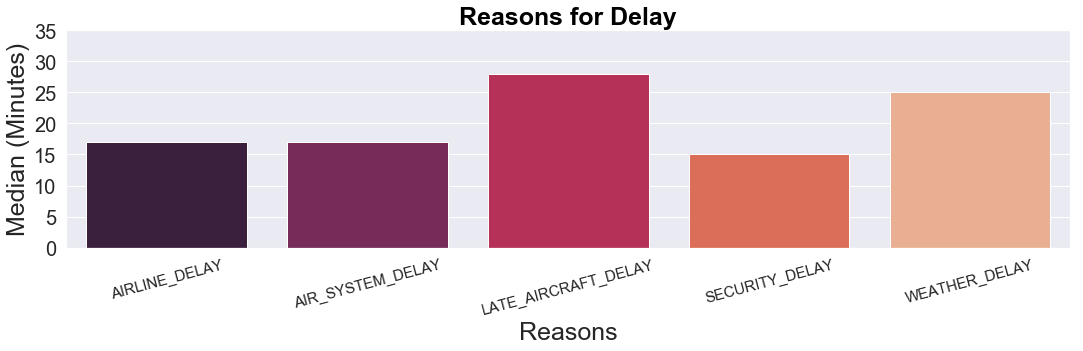

In [13]:
delay_reason = data_delay_long.groupby('TYPE_OF_DELAY')[['DURATION']].median().reset_index()
plt.figure(figsize = (18, 4))
sns.barplot(x = 'TYPE_OF_DELAY', y = 'DURATION', data = delay_reason, palette = 'rocket')
plt.xticks(rotation = 15, fontsize = 15)
plt.title('Reasons for Delay', color = 'Black', fontweight="bold", fontsize = 25)
plt.xlabel('Reasons', fontsize = 25)
plt.ylabel('Median (Minutes)', fontsize = 25)
plt.ylim(0, 35)
plt.yticks(fontsize = 20)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

### Comparison between Spirit Airlines closest competitors

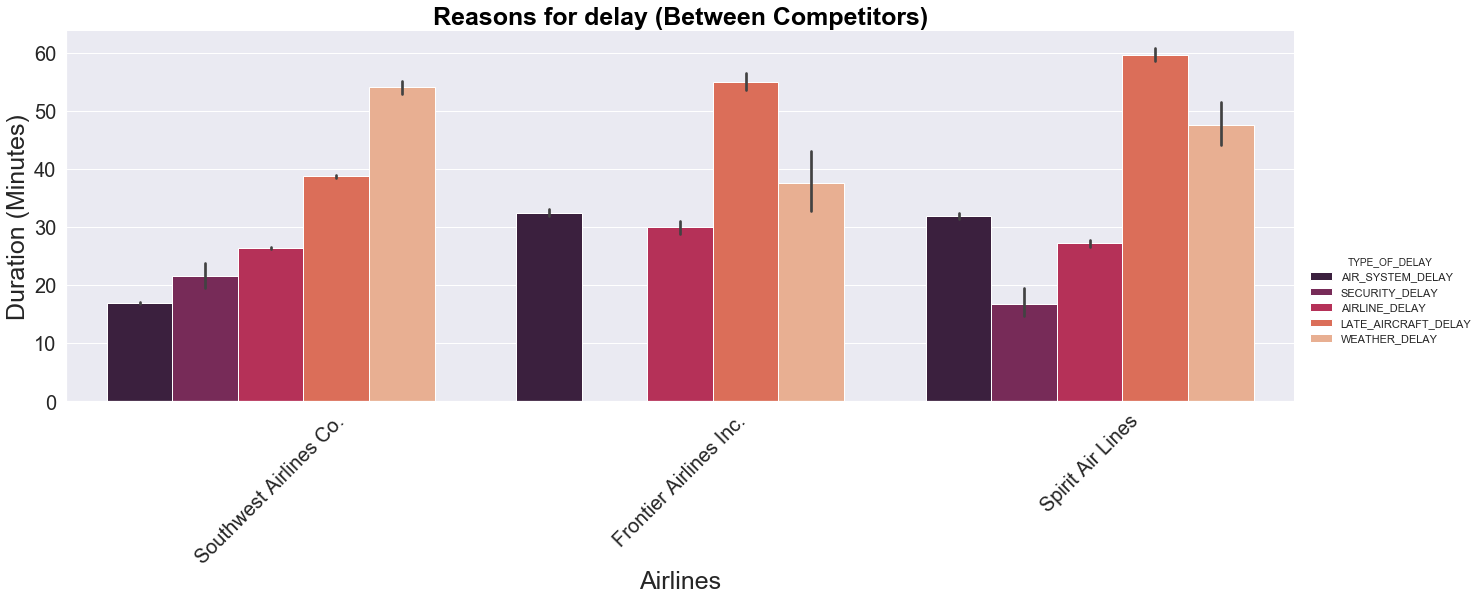

In [14]:
data_delay_long2 = data_delay_long[(data_delay_long['AIRLINE_CODE'] == 'NK')|
                                   (data_delay_long['AIRLINE_CODE'] == 'WN')|
                                   (data_delay_long['AIRLINE_CODE'] == 'F9')]

sns.catplot(x = 'AIRLINE', y = 'DURATION', hue = 'TYPE_OF_DELAY', kind = 'bar', data = data_delay_long2, height = 6, aspect = 3, palette = 'rocket')
plt.xticks(rotation = 45, fontsize = 20)
plt.title('Reasons for delay (Between Competitors)', color = 'black', fontweight="bold", fontsize = 25)
plt.xlabel('Airlines', fontsize = 25)
plt.ylabel('Duration (Minutes)', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show()

From both graphs above, it is apparent that the main reason for flight delays is due to late inbound aircraft

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Understanding the interday delays between competitors

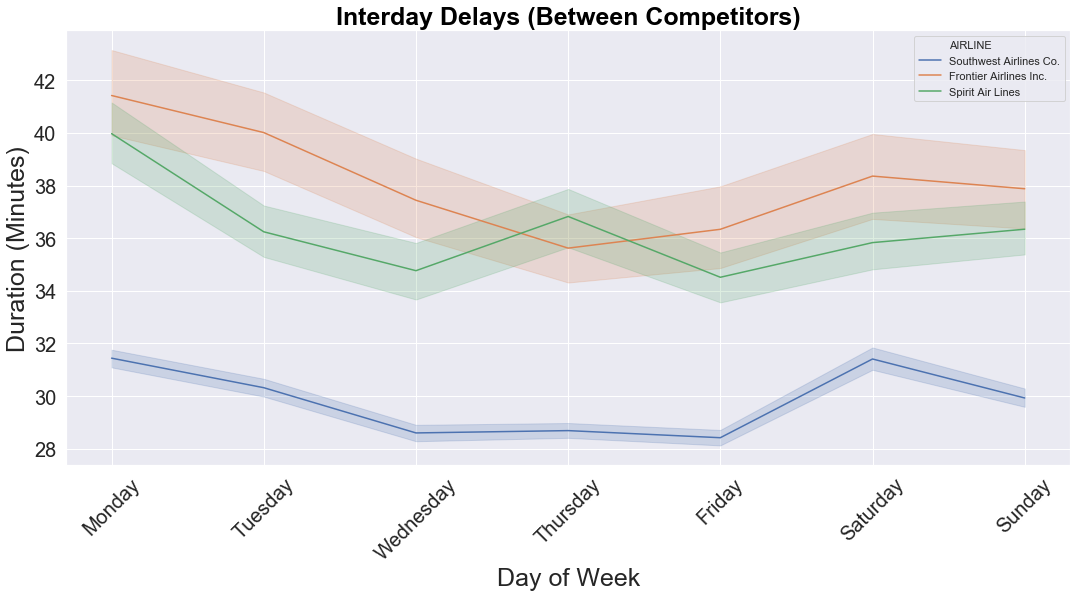

In [15]:
plt.figure(figsize = (18,8))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.lineplot(x = 'DAY_OF_WEEK', y = 'DURATION', hue = 'AIRLINE', data = data_delay_long2)
plt.xticks(range(1,8), days, rotation = 45, fontsize = 20)
plt.title('Interday Delays (Between Competitors)', color = 'black', fontweight="bold", fontsize = 25)
plt.xlabel('Day of Week', fontsize = 25)
plt.ylabel('Duration (Minutes)', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show()

It also seems that flight delays happen mostly during the weekends (peaks on Mondays followed by Sundays and Saturdays)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### And within Spirit Airlines

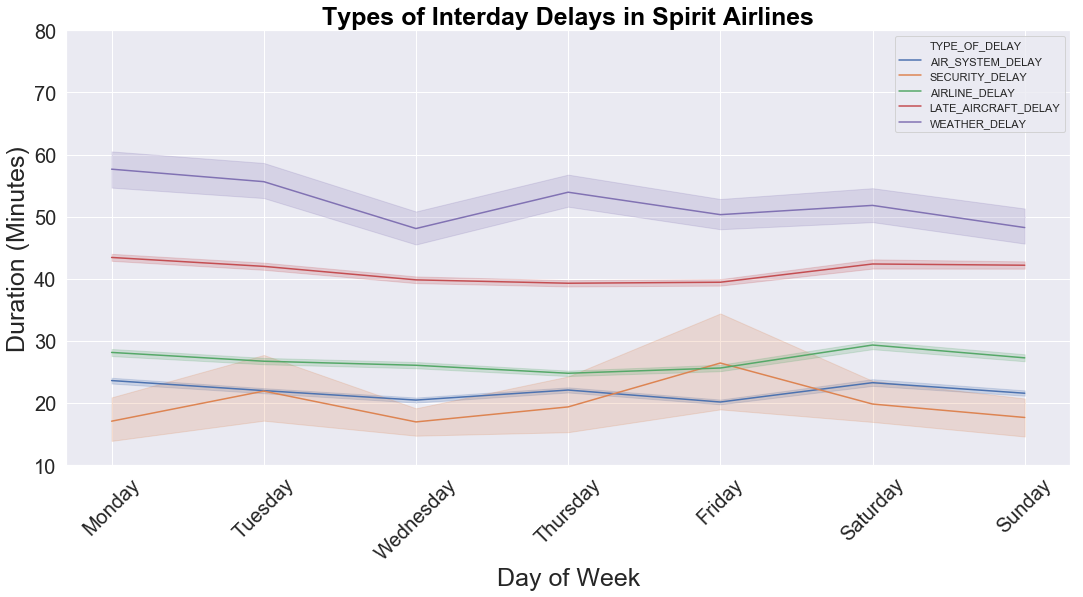

In [16]:
plt.figure(figsize = (18,8))
sns.lineplot(x = 'DAY_OF_WEEK', y = 'DURATION', hue = 'TYPE_OF_DELAY', data = data_delay_long2)
plt.xticks(range(1,8), days, rotation = 45, fontsize = 20)
plt.title('Types of Interday Delays in Spirit Airlines', color = 'black', fontweight="bold", fontsize = 25)
plt.xlabel('Day of Week', fontsize = 25)
plt.ylabel('Duration (Minutes)', fontsize = 25)
plt.ylim(10, 80)
plt.yticks(fontsize = 20)
plt.show()

We filtered out the total number of delays and calculated the total number of flights by every major US airlines
in our dataset for the year 2015. As the size of every airline differs, it will not be comparable to rank them
based on the number of delays. Thus, we found the percentage of delays contributed by every airline based on the
total flights they have completed in 2015.

Based on the percentage, it is shown that Spirit has the highest number of delays in terms of the percentage.
This indicates that flight delay is a business problem that Spirit Air Lines needs to address.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

##  Linear Regression
Earlier on, we created a long data dataframe called data_delay_long from the main database by collapsing all the reasons for delay into a column which could also be used as a categorical variable for regression. 

In [17]:
data_delay_long.head(2).T

,5,6
YEAR,2015,2015
MONTH,1,1
DAY,5,7
DAY_OF_WEEK,1,3
AIRLINE_CODE,AS,AS
AIRLINE,Alaska Airlines Inc.,Alaska Airlines Inc.
ORIGIN_AIRPORT,ANC,ANC
ORIGIN_CITY,Anchorage,Anchorage
DESTINATION_AIRPORT,SEA,SEA
DESTINATION_CITY,Seattle,Seattle


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

We selected only the columns that would be relevant for our regression analysis.

In [18]:
reg_data = data_delay_long[['DAY_OF_WEEK', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIRCRAFT_SPEED', 'TYPE_OF_DELAY']]
reg_data.shape

(1666261, 12)

Identifying our number of predictors.

In [19]:
predictors = set(['DAY_OF_WEEK', 'DEPARTURE_TIME', 'DEPARTURE_DELAY','TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE', 'TAXI_IN', 'ARRIVAL_TIME', 'AIRCRAFT_SPEED', 'TYPE_OF_DELAY'])
p = len(predictors)
p

11

### Building the linear regression model
After removing variables that will skew our results, (since speed = distance / time, they will already have an inherent multicollinearity) 

and also variables that involves time, (datas are in 24 hour format eg. 2300 and 0300, which will inflate the R^2 value) 

we have an adj R2 of 0.971. This shows that this model is able to explain 97.1% of the variation. With a high adj R2 this model has a high predictive power and all the predictors in this model are statistically significant. (P-values < 0.05) 

In [20]:
model3 = smf.ols('ARRIVAL_DELAY ~ C(DAY_OF_WEEK) + DEPARTURE_DELAY + TAXI_OUT + DISTANCE + TAXI_IN  + TYPE_OF_DELAY', data = reg_data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.978e+06
Date:                Sun, 29 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:50:39   Log-Likelihood:            -6.3757e+06
No. Observations:             1666261   AIC:                         1.275e+07
Df Residuals:                 1666246   BIC:                         1.275e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Insights from our statistical analysis thus far

For our statistical analysis, we are focusing on these three values, adjusted R2, F-statistics and p-value. We have observed that the adjusted R2 value of our final model is 0.971 which shows that this model is able to explain 97.1% of the variation and has a strong predictive power for ‘Arrival Delay’.

For Prob (F statistics), we observe that it is 3.978e+06 which is significant. This indicates that at least one variable in the regression model has beta ≠ 0. In order to find out which variables are significant, we will take a look at the p-values of all the variables. We observe that all of the p-values are close to 0 which is less than 0.05 which is significant and allow us to conclude that all the variables in the regression model do affect arrival delay. 

However, the accuracy of the conclusion is limited by the sample size of the data as mentioned above. 

Assuming that our regression model is accurate, we discover that “Distance” is negatively correlated to “Arrival Delay” and 1 unit change in “Distance” would result in a -0.0022 change in “Arrival Delay”. This would mean that the airline would mostly likely able to either increase the airspeed to shorten flight time, or to request for direct routing (Marker, 2018). Such long distance would give the airline ample opportunity to make up for the delay during the flight. However, it must be noted that there are certain limitations to these solutions. Firstly, an increase in aircraft speed would increase the operating cost as it would incur extra fuel cost (IATA, 2017). Secondly, requesting for a direct route is not as significant as a typical route could only be shortened by an average of five minutes. 

Next, we have detected that the weekends are highly likely to have a higher Arrival Delay as seen by the coefficients of 0.3273 and 0.2799. This is in line with our earlier findings with the visualisation. This is most likely due to the peak traffic during weekends, which contributes further to various delaying factors such as human error and saturation of equipments/manpower.

Finally, we can conclude that Air System Delay is the main type of Arrival Delay as seen by the coefficient of 6.6307 as compared to the other types of delay. This is contradicting to what we hypothesised earlier -- this means that any delays due to late inbound aircraft is less likely to determine/predict if the flight will actually be delayed.

Hence, Airlines should look into a more efficient planning of schedule such that sufficient buffer time is allocated in the turnover time to ensure that the delay would not affect the subsequent flights. 


## Hub and Spoke Analysis

https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [21]:
busy_hubs = ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'LAS', 'SEA',
             'CLT', 'EWR', 'MCO', 'PHX', 'MIA', 'IAH', 'BOS', 'MSP', 'DTW', 'FLL', 'PHL', 'LGA',
             'BWI', 'SLC', 'DCA', 'IAD', 'SAN', 'MDW', 'TPA', 'HNL', 'PDX']
small_hubs = ['DAL', 'BNA', 'AUS', 'STL', 'SJC', 'HOU', 'OAK', 'MSY', 'RDU',
              'SMF', 'MCI', 'SNA', 'SAT', 'CLE', 'RSW', 'IND', 'PIT', 'SJU', 'CVG', 'CMH', 'OGG',
              'BDL', 'PBI', 'MKE', 'JAX', 'BHM', 'ANC', 'ABQ', 'BUR', 'BUF', 'OMA', 'ONT']
combined_hubs = []
for i in busy_hubs:
    combined_hubs.append(i)
for x in small_hubs:
    combined_hubs.append(x)

In [22]:
data_large = data_delay_long.copy()
data_small = data_delay_long.copy()
data_large = data_large[data_large['ORIGIN_AIRPORT'].isin(busy_hubs)]
data_small = data_small[data_small['ORIGIN_AIRPORT'].isin(small_hubs)]
display(data_small['ORIGIN_AIRPORT'].unique())
display(data_large['ORIGIN_AIRPORT'].unique())

array(['ANC', 'ONT', 'MKE', 'BNA', 'SMF', 'AUS', 'MCI', 'SAT', 'CLE',
       'OMA', 'OAK', 'ABQ', 'MSY', 'RDU', 'CVG', 'DAL', 'STL', 'OGG',
       'SJC', 'HOU', 'SNA', 'BUR', 'BUF', 'IND', 'PIT', 'CMH', 'SJU',
       'JAX', 'BDL', 'RSW', 'PBI', 'BHM'], dtype=object)

array(['LAX', 'SFO', 'LAS', 'DEN', 'SLC', 'PDX', 'MSP', 'PHX', 'ORD',
       'HNL', 'MCO', 'BOS', 'DFW', 'IAH', 'PHL', 'IAD', 'JFK', 'ATL',
       'DCA', 'FLL', 'TPA', 'EWR', 'MIA', 'BWI', 'CLT', 'DTW', 'SAN',
       'MDW', 'SEA', 'LGA'], dtype=object)

In [23]:
net_delay2 = data_large.groupby('AIRLINE')[['ARRIVAL_DELAY']].count()
total_flights2 = data.groupby('AIRLINE')[['YEAR']].count()

percentage2 = pd.concat([net_delay2,total_flights2], axis = 1)
percentage2.columns = ['net_delay', 'total_flights']
percentage2.insert(loc = 2, column = 'percentage', value = 100*(percentage2['net_delay']/percentage2['total_flights']))
percentage2['rank'] = percentage2['percentage'].rank(ascending = False).astype(int)
percentage2 = percentage2.sort_values(by = 'AIRLINE')
percentage2 = percentage2.reset_index()

net_delay3 = data_small.groupby('AIRLINE')[['ARRIVAL_DELAY']].count()
total_flights3 = data.groupby('AIRLINE')[['YEAR']].count()

percentage3 = pd.concat([net_delay3,total_flights3], axis = 1)
percentage3.columns = ['net_delay', 'total_flights']
percentage3.insert(loc = 2, column = 'percentage', value = 100*(percentage3['net_delay']/percentage3['total_flights']))
percentage3['rank'] = percentage3['percentage'].rank(ascending = False).astype(int)
percentage3 = percentage3.sort_values(by = 'AIRLINE')
percentage3 = percentage3.reset_index()

In [24]:
percentage3.columns

Index(['AIRLINE', 'net_delay', 'total_flights', 'percentage', 'rank'], dtype='object')

C:\Users\pinkr\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


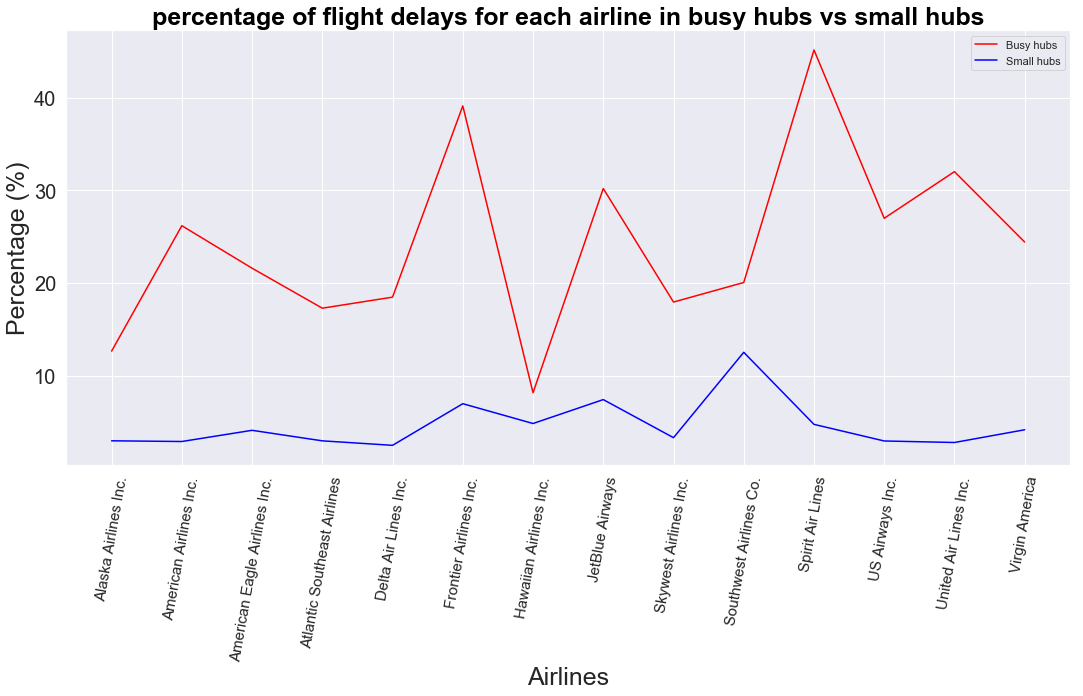

In [25]:
fig = plt.figure(figsize = (18,8))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

sns.lineplot(data = percentage2, x='AIRLINE' , y ='percentage' , ax = ax1, markers = "o", color = 'red')
sns.lineplot(data = percentage3, x='AIRLINE' , y ='percentage' , ax = ax2, markers = "o", color = 'blue')
plt.xticks(percentage2['AIRLINE'], rotation = 80, fontsize = 15)
plt.title('percentage of flight delays for each airline in busy hubs vs small hubs', color = 'black', fontweight="bold", fontsize = 25)
plt.xlabel('Airlines', fontsize = 25)
plt.ylabel('Percentage (%)', fontsize = 25)
plt.yticks(fontsize = 20)
plt.legend(['Busy hubs', 'Small hubs'])
plt.show()

### Conclusions drawn from the hub and spoke hypothesis

We have decided to embark on this hypothesis expecting the hub and spoke operations to ease operational complexity, thereby streamlining flight paths and improving efficiency of intercontinental travel. However, it can be seen that flights are more likely to be delayed in busier hubs since the graph of busy hubs is always above the graph of smaller hubs. Of course, there are many assumptions made when doing such univariate analysis and we are holding many other contributing factors constant.

For instance, delays in the busier hubs may not always be due to the inefficiency of hub and spoke operations -- it can also be due to traffic congestion, lack of ground resources, poor airport management etc.

However, it is still fair to say that hub and spoke operations do saturate flight traffic in busier and popular hubs, which will then cause a massive congestion and therefore a larger flight delay. Though it might be far fetched to conclude whether hub and spoke operations is beneficial at all, it is still interesting to see that there is a positive correlation between such operations and flight delays, which is the exact opposite of what we expected.